# Bass diffusion model

# Introduction #

Bass diffusion model is used to to predict how market reacts when new product is introduced. It can be used to predict how big fraction of potential buyers will have adopted the product at certain point of time. From this, peaks of high sales can be derived and utilized to better prepare for these peaks.




# Description of the model #

When a new product is introduced, we assume that that there exists a population of buyers, which will adopt the product entirely as time passes. We assume that whole population will eventually adopt the product (with passing time, fraction of adopters of the whole population of potential users will converge to $1$)

For this model, we assume that there exist two kinds of buyers:

1) innovators\
2) imitators

Innovaters (or we can say hipsters) are those, who adopt the product in the beginning, when there is not yet wide awareness about existence of the product. They gain awareness about the product and adopt it from their own initiative. Imitators react to innovaters and to themselves. They adopt the product in such a way that they copy the behaviour of innovators and other imitators, who have already adopted the product. Therefore the rate at which the total fraction of buyers is increasing is dependent on rate of innovativness, rate of imitation and value of fraction of those, whou have already bought the product.



Thus the model is described by the following equation:

\begin{equation*}
\frac{\dot{y}(t)}{1-y(t)}=p + q \cdot y(t)
\end{equation*}



$t$ = time passed since the introduction of the product (introduction begins at $t = 0$)

$y(t)$ = total fraction of potential buyers, which have adopted the product at time $t$

$\dot{y}(t)$ = change in $y(t)$ at time $t$ i.e., the rate of adoption

$p$ = coefficient of innovation

$q$ = coefficient of imitation

However, there are two additional conditions:

1) First, at the time of the introduction, nobody has adopted the product yet. Therefore $y(0) = 0$. This assumption is reasonable from economic point of view. Also it is necessary for us to acquire the solution, as can be seen in the following chapter.

2) Second, at any given point in time, fraction of buyers from population of all potential buyers lies between zero and one (one not inclusive). Therefore $y(t) \in [0,1)$ for $t \in [0, \infty)$.

# Solution #



The model can be rewritten like this:

\begin{equation*}
\dot{y}(t) = (1-y(t)) \cdot (p + q y(t))
\end{equation*}

To make the solution more concise and clear, I will omit the $t$ inside $y(t)$ and $\dot{y}(t)$.

It is obvious that we are dealing with autonomous differential equation. According to Theorem 6 from Matematika IV, we already know, that $y(t)$ will be monotonous. Is is also obvious that given the possible values of $y(t)$, we do not care about stationary points. We will adjust the function a bit:

\begin{equation*}
\frac{\dot{y}}{(1-y) \cdot (p + q y)} = 1
\end{equation*}

Again from Matematika IV we know that we can take primitive function of the denominator on the left-hand side of the equation and primitive function of the right-hand side and following equation will hold:

\begin{equation*}
\int\frac{1}{(1-y) \cdot (p + q y)}dy = \int 1 dt + c
\end{equation*}

where c is a real constant. Therefore

\begin{equation*}
\int\frac{1}{(1-y) \cdot (p + q y)}dy = t + c
\end{equation*}

From now on, we will deal with the left-hand side of the equation. We will adjust the denominator a bit:

\begin{equation*}
\int\frac{1}{(1-y) \cdot (p + q y)}dy = \frac{-1}{q}\int\frac{1}{(y-1) \cdot (y + \frac{p}{q})}dy
\end{equation*}

Now we can use Partial fraction decomposition, where A and B are real numbers:

\begin{equation*}
\frac{1}{(y-1) \cdot (y + \frac{p}{q})} = \frac{A}{y + \frac{p}{q}} + \frac{B}{y-1}
\end{equation*}

We can easily derive that

\begin{equation*}
1 = y(A+B) + (-A + B \frac{p/q})
\end{equation*}

That gives us set of two linear equations:

\begin{equation*}
A + B = 0  
\end{equation*}
\begin{equation*}
-A + B\frac{p}{q}=1
\end{equation*}

From these two equations, it is simple to derive that
\begin{equation*}
A = \frac{1}{-1-\frac{p}{q}}
\end{equation*}
and 
\begin{equation*}
B = \frac{1}{1+\frac{p}{q}}
\end{equation*}

So we can plug these values back into the integral:

\begin{equation*}
= \frac{-1}{q}\int\frac{\frac{1}{1+\frac{p}{q}}}{(y-1)} + \frac{\frac{1}{-1-\frac{p}{q}}}{y + \frac{p}{q}}dy = \frac{-1}{q} \cdot \frac{1}{-1-\frac{p}{q}} \int \frac{1}{y + \frac{p}{q}} dy + \frac{-1}{q} \cdot \frac{1}{1+\frac{p}{q}} \int \frac{1}{y-1}dy
\end{equation*}

To solve these integrals, we use trivial substitution and that $ \int \frac{1}{x} = ln|x|$ when $x \in (-\infty,0) \cup (0,\infty)$

\begin{equation*}
= \frac{1}{q\cdot \Big(1+\frac{p}{q}\Big)} \cdot ln\Big|y+\frac{p}{q}\Big|-\frac{1}{q \cdot \Big(1 + \frac{p}{q}\Big)} \cdot ln|y-1|
\end{equation*}

Now we apply second additional condition ($y \in [0,1)$) and derive that we can get rid of first absolute value in straightforward way. However, content of second absolute value will always be negative, which gives us this:

\begin{equation*}
\frac{1}{q\cdot \Big(1+\frac{p}{q}\Big)} \Bigg( ln\Big(y + \frac{p}{q}\Big) - ln (1-y) \Bigg) = \frac{1}{p + q} \cdot \Bigg( ln \Bigg( \frac{y + \frac{p}{q}}{1-y} \Bigg) \Bigg)
\end{equation*}

We can plug last formula back and get

\begin{equation*}
\frac{1}{p + q} \cdot \Bigg( ln \Bigg( \frac{y + \frac{p}{q}}{1-y} \Bigg) \Bigg) = t + c
\end{equation*}

$$ \frac{-1}{q}\int\frac{\frac{1}{1+\frac{p}{q}}}{(y-1)} - \frac{\frac{1}{1+\frac{p}{q}}}{y + \frac{p}{q}}dy  $$

In [4]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

sp.init_printing()

ModuleNotFoundError: No module named 'sympy'

In [5]:
t = sp.symbols('t', real=True)

F = sp.Function('F')

p = sp.symbols('p') # coefficient of innovation
q = sp.symbols('q') # coefficient of imitation

K = sp.Symbol('K')  # coefficient value in the solution

NameError: name 'sp' is not defined

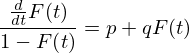

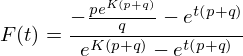

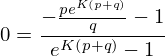

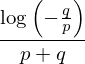

In [7]:
eq1 = sp.Eq(F(t).diff(t)/(1-F(t)), p + q * F(t)) # the difference equation

display(eq1)


sol = sp.dsolve(eq1, F(t)).subs('C1', K)         # solution of the difference equation
display(sol)



display(sp.Eq(F(0), 0))                          # the initial condition

sol_in = sol.subs(t,0)                           # putting in the initial condition

initial = sp.Eq(0, sol_in.rhs)
display(initial)
initial_sol =  sp.solve(initial, K)              # general solution of coefficient for this initial condition


coeff = initial_sol[0]                           # it will we complex number - what does not work?
display(coeff)

values = coeff.subs([(p, 0.03), (q, 0.38)])      # just to check, common values of p and q are used as inputs
display(values)


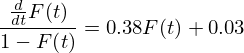

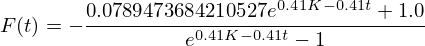

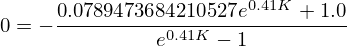

In [8]:
eq1 = sp.Eq(F(t).diff(t)/(1-F(t)), 0.03 + 0.38 * F(t)) # the difference equation

display(eq1)


sol = sp.dsolve(eq1, F(t)).subs('C1', K)         # solution of the difference equation
display(sol)

c = sp.solve(sol.rhs.subs(t,0))
display(c)

display(sp.Eq(F(0), 0))                          # the initial condition

sol_in = sol.subs(t,0)                           # putting in the initial condition

initial = sp.Eq(0, sol_in.rhs)
display(initial)
initial_sol =  sp.solve(initial) 
display(initial_sol)